In [1]:
from bs4 import BeautifulSoup
import re
import glob
import pandas as pd

path = glob.glob('./html/*.html')

In [2]:
for p in path:
    name = p.replace('.html','').replace('./html\\','')  
    html = open(p,'r',encoding="utf-8_sig")
    soup = BeautifulSoup(html,"html.parser")

    tr = soup.find_all('tr')
    columns = [i.text.replace('\n','') for i in tr[0].find_all('th')]

    df = pd.DataFrame(index=[],columns=columns[1:])

    for l in tr[1:]:
        lines = [i.text for i in l.find_all('td')]
        lines = [i.replace('\n','') if n != 6 else re.sub(r'[\n]+', ",", i)  for n,i in enumerate(lines)]
        lines = pd.Series(lines, index=df.columns)
        df = df.append(lines,ignore_index=True)

    df.to_csv('./csv/'+name+'.csv', encoding='utf_8_sig', index=False)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import pandas as pd
import collections
import numpy as np
import seaborn as sns
import datetime
import collections
plt.set_cmap(plt.cm.brg);

sns.set(font='MS Gothic')
%matplotlib inline
path = glob.glob('./csv/*.csv')

In [22]:
df = pd.read_csv('./csv/1.csv')
#df = df.drop(['文献番号', '出願番号', '公知日', '発明の名称', 'FI'], axis = 1)

#いい感じに整形
def getyear(x):
   '''
   何年だけにする
   '''
   x = x.replace('/','')
   x = datetime.datetime.strptime(x,'%Y%m%d')
   return x.year

def replacebs(x):
   '''
   改行文字をなくす
   '''
   x = x.replace('\u3000','_')
   return x

#適用
df['出願日'] = df['出願日'].map(getyear)
df['出願人/権利者'] = df['出願人/権利者'].map(replacebs)


temp = collections.Counter(df['出願人/権利者'])
temp = temp.most_common()[:15]                               #上位N社を選抜

common_list = []
for i in temp:
   common_list.append(i[0])  #(出願者,出願数)のタプルになっているので出願者のみ取り出す。。

print(common_list)

['株式会社東芝', 'ホ－プ_カブシキガイシヤ', 'ザ・バートン・コーポレイション', 'ハンネス_マルケル', '沖電気工業株式会社', '株式会社カーメイト', '株式会社シマノ', '東レ株式会社', '富士通株式会社', '東京芝浦電気株式会社', '株式会社ジャパーナ', '日本電気株式会社', 'ハーテーエム_シュポルト－_ウント_フライツァイトゲレーテ_アクチエンゲゼルシャフト', 'マーカー_インターナショナル_コムパニー', 'ボア_テクノロジー，インコーポレイテッド']


In [23]:
#上位N社の出願数/年のピボットテーブル作成＞結合
df_list = []
company_year_df = df.pivot_table(index = '出願人/権利者', columns = '出願日', aggfunc = 'count').fillna(0)
for i in common_list:
    temp_df = company_year_df.loc[i,'出願番号']
    df_list.append(temp_df)
    comp_df = pd.DataFrame(df_list)

<AxesSubplot:xlabel='出願日'>

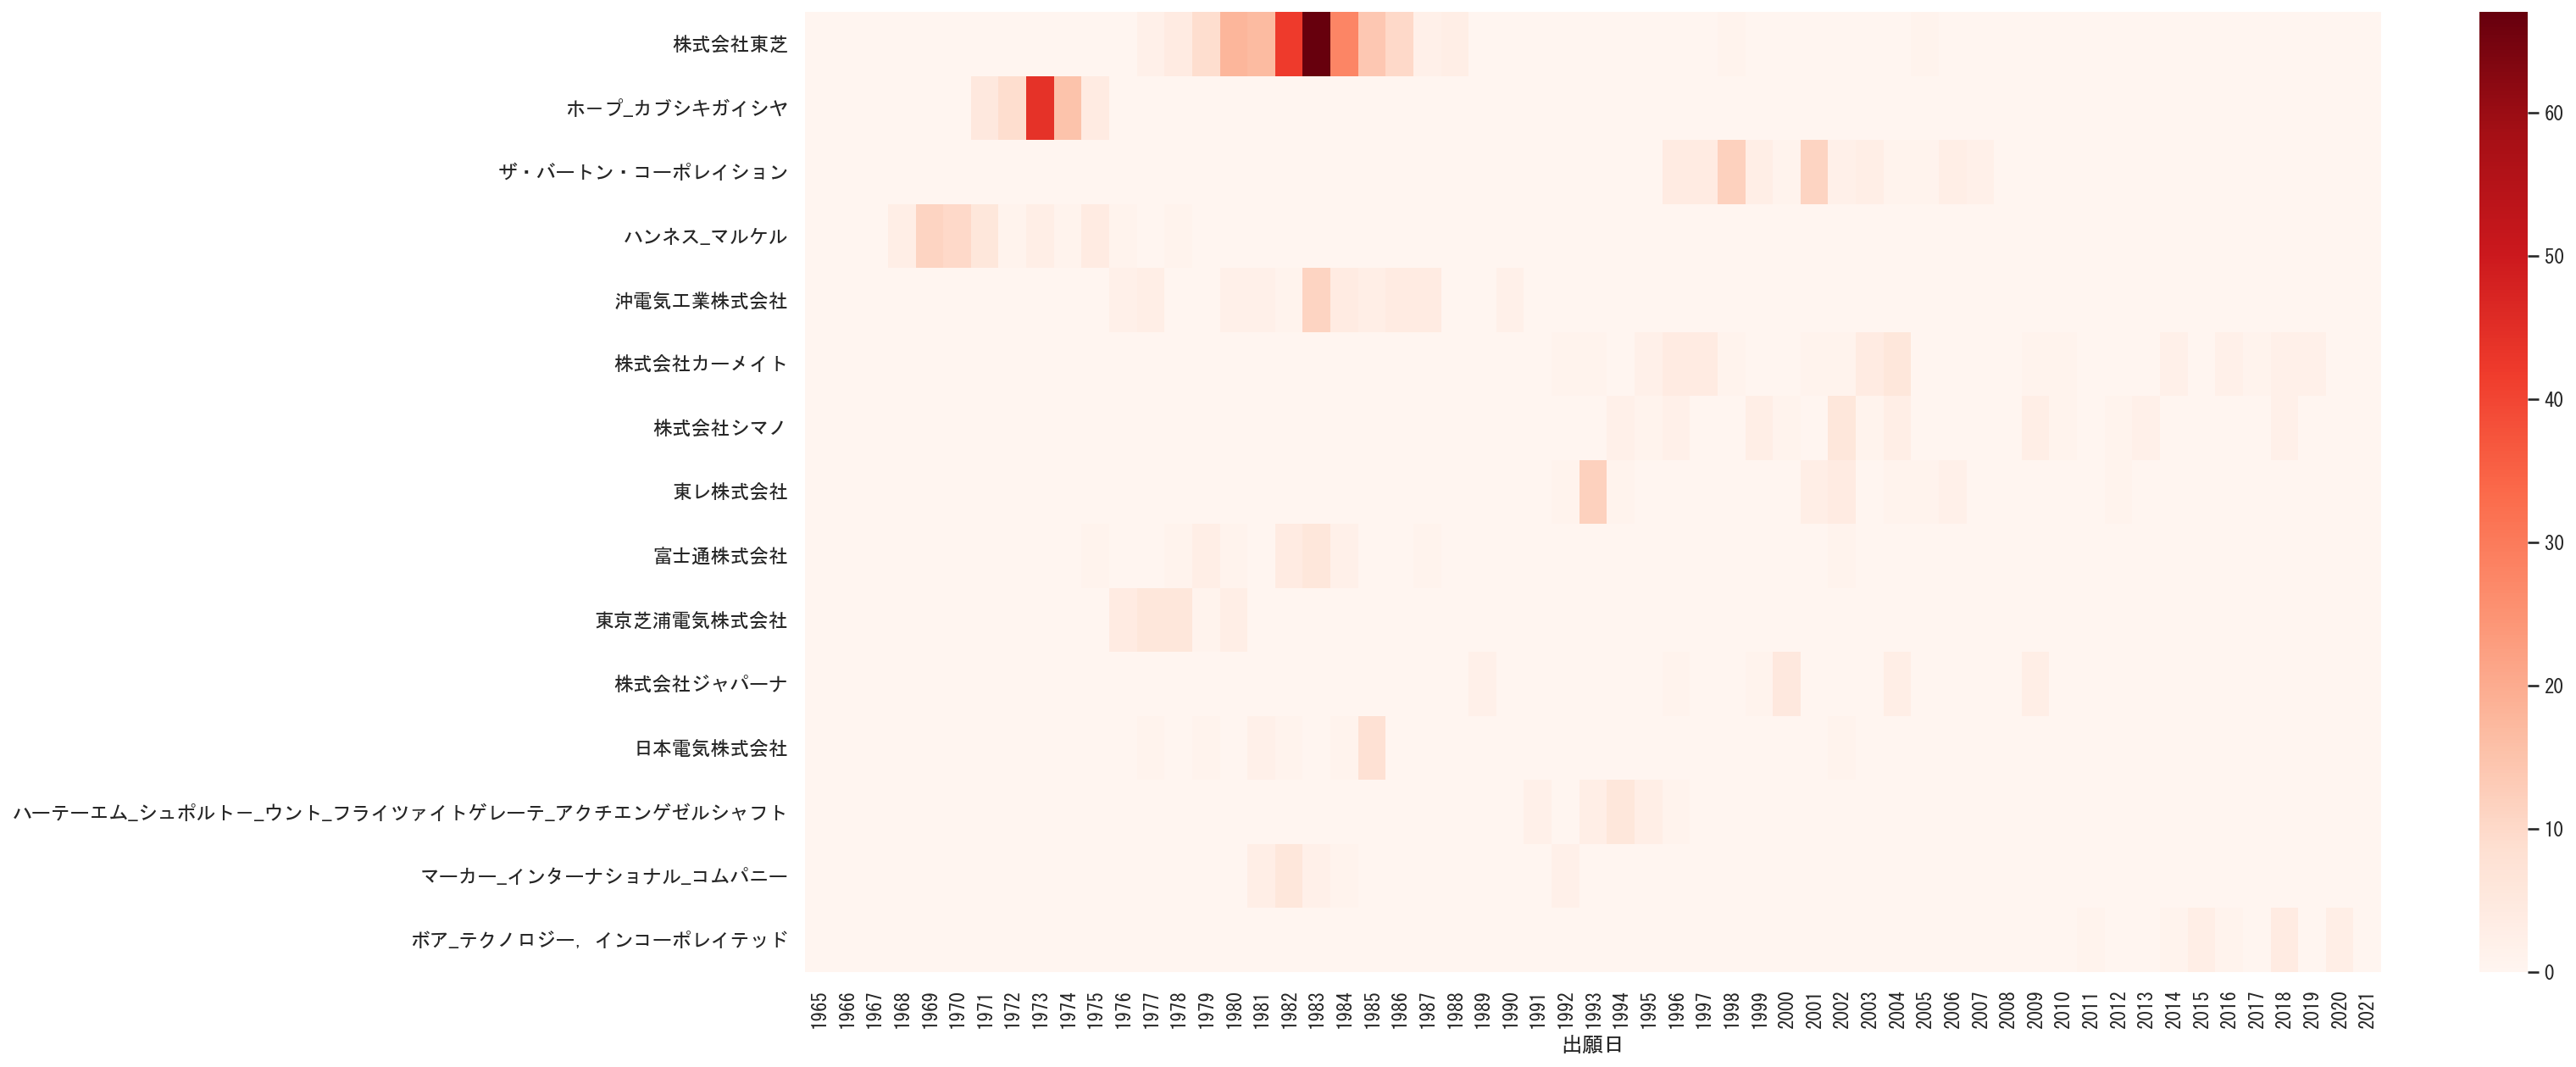

In [103]:
#カラーマップ表示
fig = plt.figure(figsize=(20,10),dpi = 150)
sns.heatmap(comp_df,square=False,cmap='Reds')

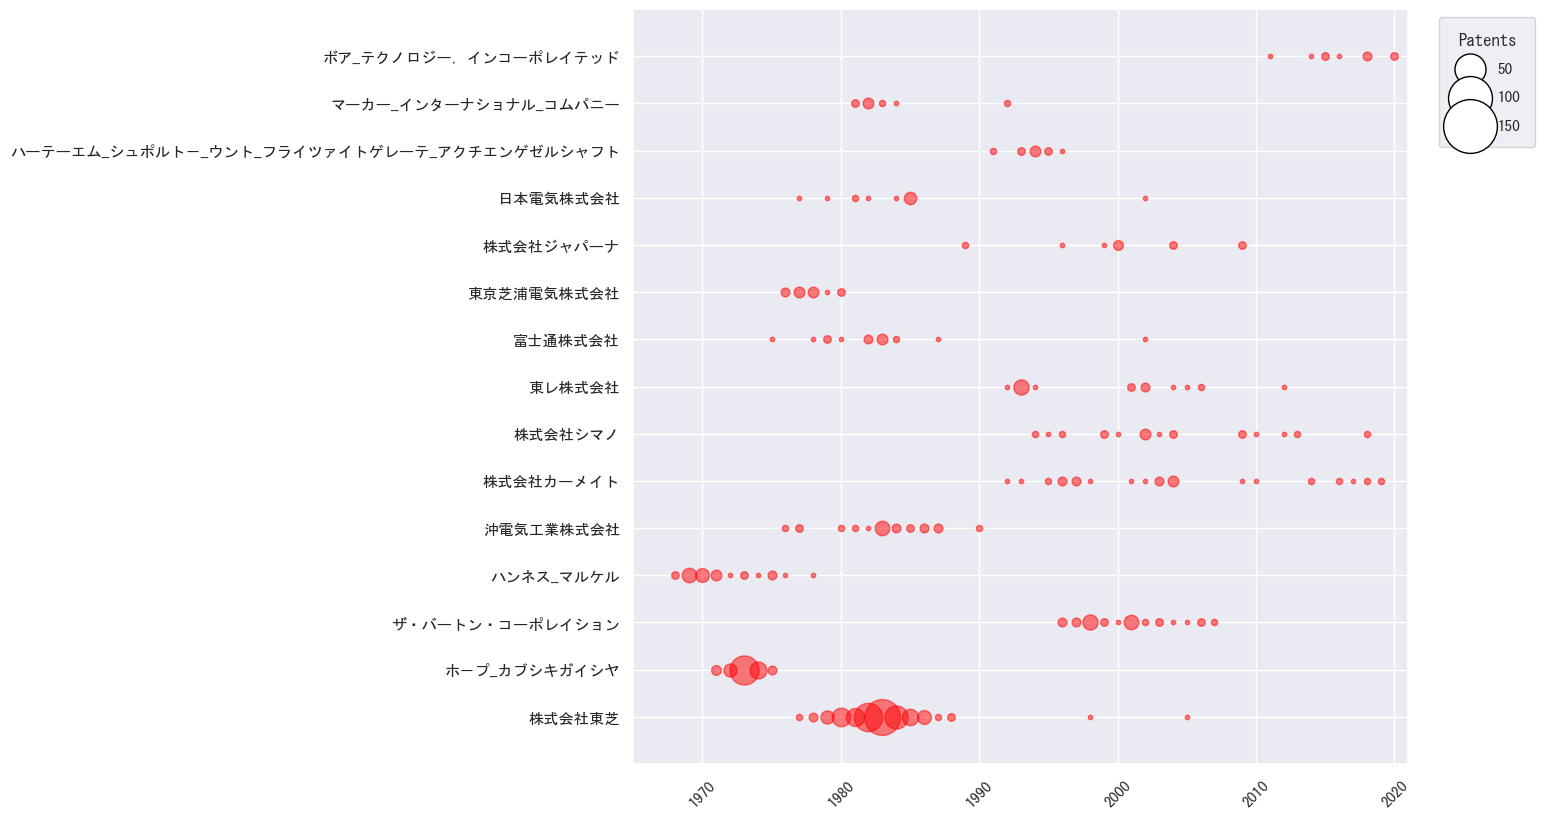

In [112]:
fig = plt.figure(figsize=(10,10),dpi=100)

#メインプロット
for i,x in enumerate(list(comp_df.index)):
    for j,y in enumerate(list(comp_df.columns)):
        plt.scatter(y, x, s=comp_df.loc[x,y]*10,alpha = 0.5, c='red')

#凡例プロット用
size = [50,100,150]
for s in size:
    plt.scatter(-100,-100,s=s*10,facecolor='white',edgecolor='black',label=str(s))
plt.legend(title='Patents', bbox_to_anchor=(1.03, 1),
           loc='upper left',labelspacing=1,borderpad=1)

plt.xlim(min(list(comp_df.columns)),max(list(comp_df.columns)))
plt.ylim(-1,len(comp_df.index))
plt.xticks(rotation=45)
plt.show()

In [113]:
cm = plt.cm.get_cmap('tab20'
)

In [115]:
cm.colors[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)